# TASK 4 - Learn the sine function in the interval [0,2π]

## Problem statement 
The goal of this subtask is to develop your own model and use it to learn the sine function on the interval [0, 2π]. Discretize the interval with a suitable number of points (of your choice) and use the values of the sine function at these discretization points as labels.Implement a Quantum Machine Learning model which reproduces the values of the sine function.

### INSTALL PENNYLANE AND IMPORT NECESSARY LIBRARIES

In [1]:
!pip install pennylane

In [14]:
import pennylane as qml
import numpy as np
from pennylane.optimize import AdamOptimizer 
import matplotlib.pyplot as plt

### To implement the quantum ML model 100 data pints were chosen , with X representing the interval from 0 to 2π and Y representing the sine function of X

In [15]:
num_data = 100
X = np.linspace(0, 2 * np.pi, num_data)
Y = np.sin(X)


### We'll use a simple variational quantum circuit with two qubits and a few layers.Our initial quantum circuit consists of a Rx  gate and a Pauli-Z gate 

In [ ]:
def layer(x):
    qml.Rot(x[0], x[1], x[2], wires=0)
    qml.Rot(x[3], x[4], x[5], wires=1)
    qml.CNOT(wires=[0, 1])

def circuit(params, x):
    qml.RX(x, wires=0)
    for i in range(2):
        layer(params[i])
    return qml.expval(qml.PauliZ(0))

# Create a default device
dev = qml.device("default.qubit", wires=2)

# Create the quantum node
qnode = qml.QNode(circuit, dev)


## Optimization

We'll use the Adam optimizer to train our model.

In [ ]:
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)
params = np.random.uniform(size=(2, 6))  # Initialize parameters

# Number of optimization steps
steps = 100
def lr_schedule(step):
    initial_lr = 0.01
    decay_rate = 0.95
    return initial_lr * decay_rate**step

opt = AdamOptimizer(lr_schedule(0), beta1=0.9, beta2=0.999)

for it in range(steps):
    opt.stepsize = lr_schedule(it)
    def cost(params):
        total_loss = 0.0
        for x, y in zip(X, Y):
            predicted_y = qnode(params, x)
            loss = (predicted_y - y)**2  # Mean squared error
            total_loss += loss
        return total_loss / len(X)

    grad = qml.grad(cost)(params)
    params = opt.step(cost, params)
    print("Step {}: Cost = {}".format(it + 1, cost(params)))


## Visualization

Let's visualize the learned sine function:

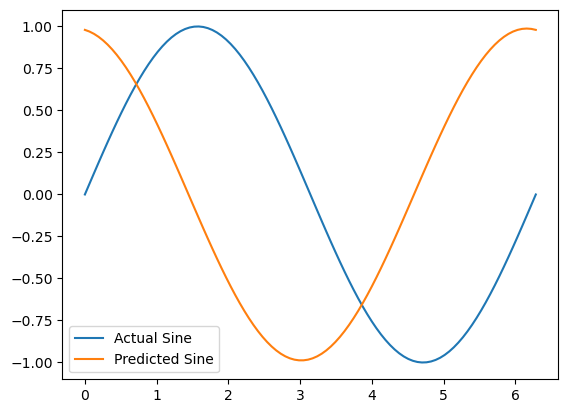

In [25]:
predicted_y = [qnode(params, x) for x in X]
plt.plot(X, Y, label="Actual Sine")
plt.plot(X, predicted_y, label="Predicted Sine")
plt.legend()
plt.show()


The result shows a clear discrepancy between the actual sine function and the predicted sine function. The predicted sine function is significantly off, indicating a potential issue with the model architecture, hyperparameters, or optimization process.
## Improving the Model

To enhance the model's performance,we consider following modifications:-
- Increase Circuit Depth and Width: Adding more layers and qubits can improve the model's capacity to represent complex functions like sine.
 - Experiment with Different Ansatzes: Trying different circuit architectures (e.g., hardware-efficient ansatz, strongly entangling circuits) to find a better representation for the sine function.
  - Optimize Hyperparameters

Step 1: Cost = 0.7700650139413326
Step 2: Cost = 0.7009963824921001
Step 3: Cost = 0.6391197701597158
Step 4: Cost = 0.5854551984943681
Step 5: Cost = 0.5403281660562143
Step 6: Cost = 0.5031741510187412
Step 7: Cost = 0.47267097590848567
Step 8: Cost = 0.44713865691432625
Step 9: Cost = 0.42492888615929386
Step 10: Cost = 0.4046231890210221
Step 11: Cost = 0.3851021855419328
Step 12: Cost = 0.3655586866895162
Step 13: Cost = 0.34548209428119747
Step 14: Cost = 0.3246286117512243
Step 15: Cost = 0.30298371167312294
Step 16: Cost = 0.28071750049944727
Step 17: Cost = 0.2581340040275426
Step 18: Cost = 0.23561754722283965
Step 19: Cost = 0.2135805047067464
Step 20: Cost = 0.1924171285755129
Step 21: Cost = 0.17246759306329518
Step 22: Cost = 0.15399435357492122
Step 23: Cost = 0.13717043429321493
Step 24: Cost = 0.12207798759739853
Step 25: Cost = 0.10871542103469604
Step 26: Cost = 0.09701126343020054
Step 27: Cost = 0.08684234285962912
Step 28: Cost = 0.07805343383182282
Step 29: Cost 

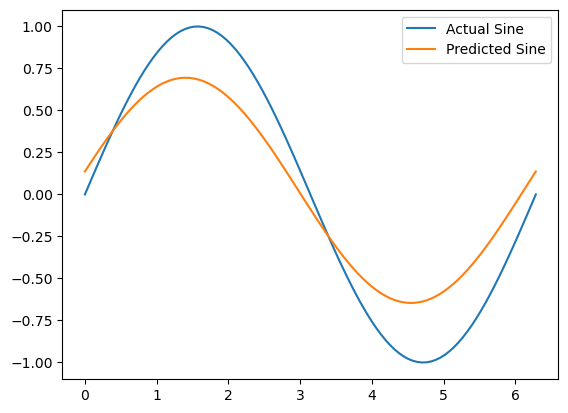

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from pennylane.optimize import AdamOptimizer

# Increase number of qubits and layers
num_qubits = 4
num_layers = 6

def layer(params, wires):
    # Use a more complex layer structure
    for i in range(num_qubits):
        qml.Rot(params[i * 3], params[i * 3 + 1], params[i * 3 + 2], wires=i)
    for i in range(num_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

def circuit(params, x):
    qml.RX(x, wires=0)
    for i in range(num_layers):
        layer(params[i * num_qubits * 3 : (i + 1) * num_qubits * 3], wires=range(num_qubits))
    return qml.expval(qml.PauliZ(0))

# Create a default device with 4 qubits
dev = qml.device("default.qubit", wires=4)

# Create the quantum node
qnode = qml.QNode(circuit, dev)

# Data preparation
num_data = 100
X = np.linspace(0, 2 * np.pi, num_data)
Y = np.sin(X)

# Optimization
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)
params = np.random.uniform(size=(num_layers * num_qubits * 3))

steps = 30

for it in range(steps):
    def cost(params):
        total_loss = 0.0
        for x, y in zip(X, Y):
            predicted_y = qnode(params, x)
            loss = (predicted_y - y) ** 2  # Mean squared error
            total_loss += loss
        return total_loss / len(X)  # Average loss

    grad = qml.grad(cost)(params)
    params = opt.step(cost, params)
    print("Step {}: Cost = {}".format(it + 1, cost(params)))

# Visualization
predicted_y = [qnode(params, x) for x in X]
plt.plot(X, Y, label="Actual Sine")
plt.plot(X, predicted_y, label="Predicted Sine")
plt.legend()
plt.show()


 The result shows improved performance of our quantum machine learning model for approximating the sine function.The predicted sine function is now closer to actual sine function. 

Observations from the graph:

 - The predicted sine curve is a good approximation of the actual sine curve, but there are still noticeable discrepancies.
 - The amplitude of the predicted curve is slightly lower than the actual curve.

Potential Improvements to improve the predictions further include:

- Increase Circuit Depth and Width: While we've already increased these parameters, further increase in number of qubits and depth of the circuit layers might be beneficial.
- Adjust Hyperparameters: Experiment with different learning rates, optimizer algorithms, and batch sizes.
 - Lowering the learning rate of the adam optimizer
 - Hybrid Quantum-Classical Models: Consider combining quantum circuits with classical neural networks.